In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from numpy.random import choice
from scipy import stats 

                                      
                                         --- [Question 1: Distribution] ---

The posterior distribution and the associated parameteres are as follows: Beta(1 + x, 1 + n - x)


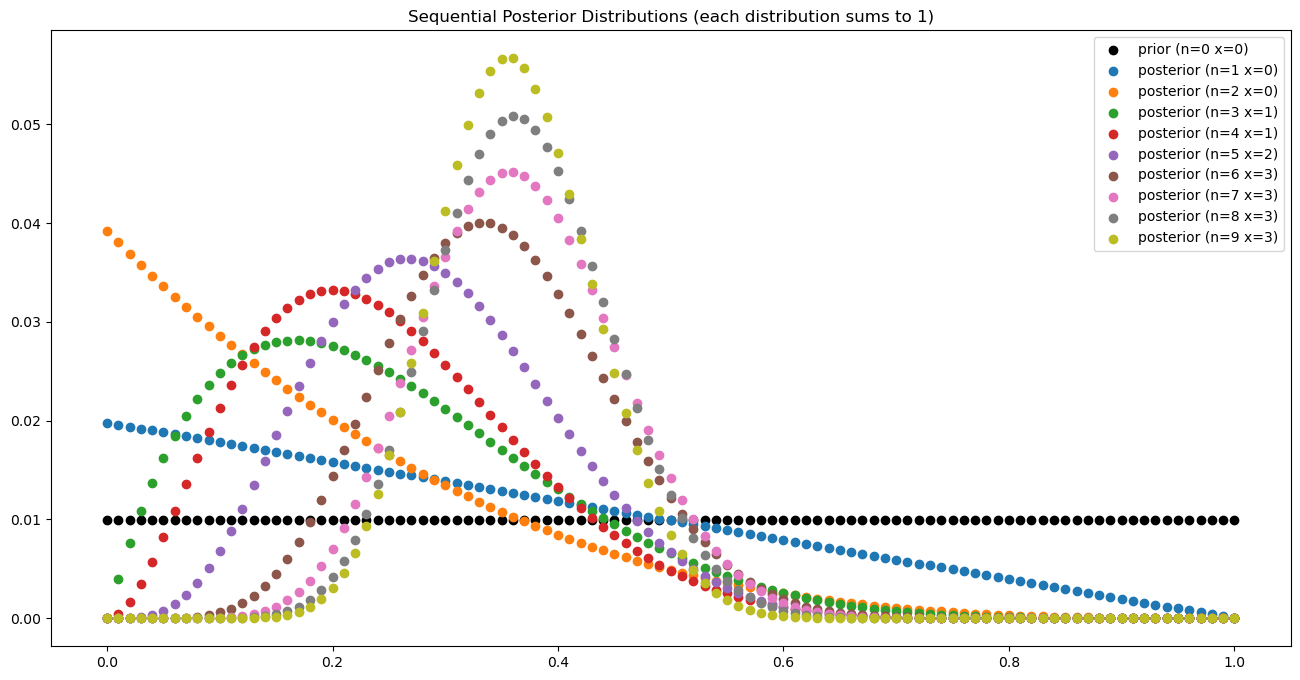

In [68]:
# Question 1:
# Create the parameter domain and a uniform prior on this domain.
parameter_domain = np.linspace(0, 1, 101)
prior = np.ones(101) / 101

# Sequence of observations.
observations = [0, 0, 1, 0, 1, 1, 0, 0, 0]
n, x = 0, 0

plt.figure(figsize=(16, 8))
plt.scatter(parameter_domain, prior, label="prior (n=" + str(n) + " x=" + str(x) + ")", color='k')
plt.title("Sequential Posterior Distributions (each distribution sums to 1)")

# Sequentially update the posterior based on each observation.
for observation in observations:
    n += 1
    x += observation
    
    # Compute the likelihood of the accumulated data assuming a binomial model.
    likelihood = stats.binom.pmf(x, n, parameter_domain)
    
    # Compute the unnormalized posterior.
    posterior = likelihood * prior
    
    # Normalize the posterior so that its total probability sums to 1.
    posterior /= np.sum(posterior)
    
    # Plot the current posterior distribution.
    plt.scatter(parameter_domain, posterior, label="posterior (n=" + str(n) + " x=" + str(x) + ")")
    
    # Update the prior for the next round (sequential updating).
    prior = posterior.copy()

plt.legend()
print("""                                      
                                         --- [Question 1: Distribution] ---

The posterior distribution and the associated parameteres are as follows: Beta(1 + x, 1 + n - x)""")
plt.show()

                            
                                        --- [Question 2: Posterior] ---

The posterior distribution P(θ_j | x_j^(t), n_j^(t)) which is proportional to the quantity 
θ_j^(x_j^(t) + α_j - 1) * (1 - θ_j)^(n_j^(t) - x_j^(t) + β_j - 1) which follows a beta distribution. 
Specifically, θ ~ beta(x_j^(t) + α_j, n_j^(t) - x_j^(t) + β_j)


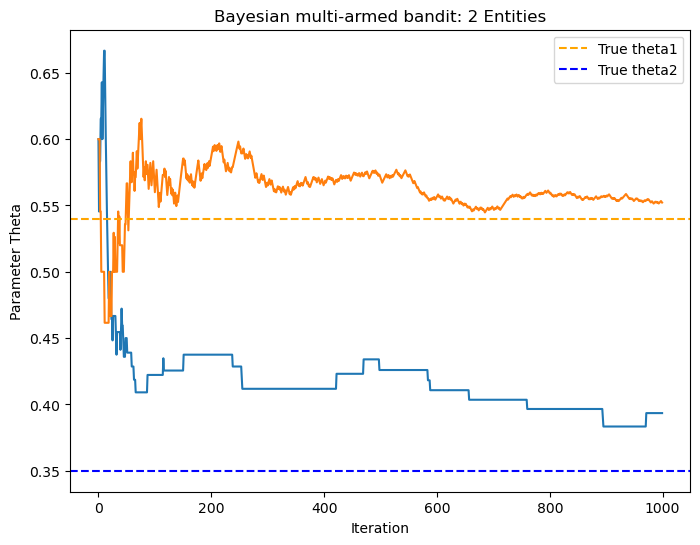

In [70]:
# Question 2:
print("""                            
                                        --- [Question 2: Posterior] ---

The posterior distribution P(θ_j | x_j^(t), n_j^(t)) which is proportional to the quantity 
θ_j^(x_j^(t) + α_j - 1) * (1 - θ_j)^(n_j^(t) - x_j^(t) + β_j - 1) which follows a beta distribution. 
Specifically, θ ~ beta(x_j^(t) + α_j, n_j^(t) - x_j^(t) + β_j)""")

alpha1, beta1 = 6, 4; alpha2, beta2 = 6, 4
theta1, theta2 = 0.35, 0.54; total_time = 1000

n1, n2 = 0, 0; x1, x2 = 0, 0; domain, result1, result2 = [], [], []

for t in range(0, total_time):
    dist1 = stats.beta(alpha1 + x1, beta1 + n1 - x1)
    dist2 = stats.beta(alpha2 + x2, beta2 + n2 - x2)
    
    domain.append(t); result1.append(dist1.mean()); result2.append(dist2.mean())
              
    prob = (dist1.rvs(size=1000) < dist2.rvs(size=1000)).mean()
    outcome = stats.binom.rvs(n=1, p=prob)
    
    if outcome == 0:
        temp1 = stats.binom.rvs(n=1, p=theta1, size=1); n1 += 1
        x1 += temp1 if isinstance(temp1, int) else temp1[0]
        
    elif outcome == 1:
        temp2 = stats.binom.rvs(n=1, p=theta2, size=1); n2 += 1
        x2 += temp2 if isinstance(temp2, int) else temp2[0]
        

plt.figure(figsize=(8, 6))
plt.plot(domain, result1)
plt.plot(domain, result2)
plt.axhline(y=theta2, color = 'orange', linestyle='--', label='True theta1')
plt.axhline(y=theta1, color = 'blue', linestyle='--', label = 'True theta2')
plt.xlabel('Iteration')
plt.ylabel('Parameter Theta')
plt.title('Bayesian multi-armed bandit: 2 Entities')
plt.legend()
plt.show('png')

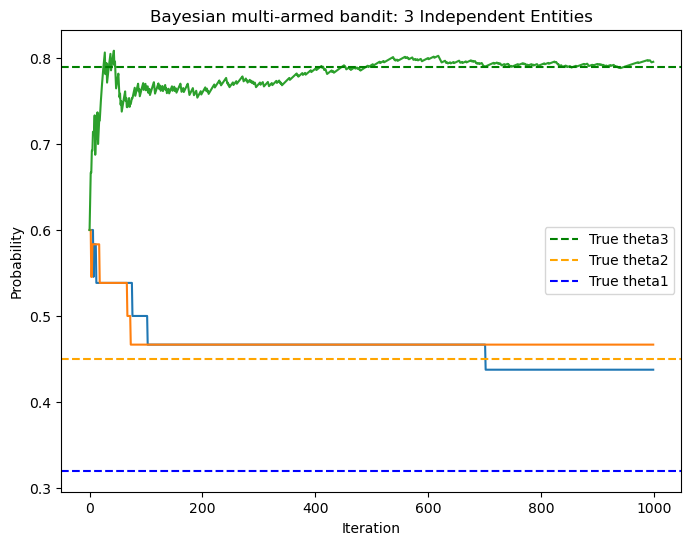

In [35]:
# Question 3: Analysis 1
alpha1, beta1 = 6, 4; alpha2, beta2 = 6, 4; alpha3, beta3 = 6, 4
theta1, theta2, theta3 = 0.32, 0.45, 0.79; total_time = 1000

n1, n2, n3 = 0, 0, 0; x1, x2, x3 = 0, 0, 0; domain, result1, result2, result3 = [], [], [], []

for t in range(0, total_time):
    dist1 = stats.beta(alpha1 + x1, beta1 + n1 - x1)
    dist2 = stats.beta(alpha2 + x2, beta2 + n2 - x2)
    dist3 = stats.beta(alpha3 + x3, beta3 + n3 - x3)
    
    domain.append(t); result1.append(dist1.mean()); result2.append(dist2.mean()); result3.append(dist3.mean())      
          
    prob1 = ((dist2.rvs(size=1000) < dist1.rvs(size=1000)) & (dist3.rvs(size=1000) < dist1.rvs(size=1000))).mean()
    prob2 = ((dist1.rvs(size=1000) < dist2.rvs(size=1000)) & (dist3.rvs(size=1000) < dist2.rvs(size=1000))).mean()
    prob3 = ((dist1.rvs(size=1000) < dist3.rvs(size=1000)) & (dist2.rvs(size=1000) < dist3.rvs(size=1000))).mean()
    
    normalize = prob1 + prob2 + prob3
    outcome = choice([0, 1, 2], p=[prob1/normalize, prob2/normalize, prob3/normalize])
    
    if outcome == 0:
        temp1 = stats.binom.rvs(n=1, p=theta1, size=1); n1 += 1
        x1 += temp1 if isinstance(temp1, int) else temp1[0]

    elif outcome == 1:
        temp2 = stats.binom.rvs(n=1, p=theta2, size=1); n2 += 1
        x2 += temp2 if isinstance(temp2, int) else temp2[0]

    elif outcome == 2:
        temp3 = stats.binom.rvs(n=1, p=theta3, size=1); n3 += 1
        x3 += temp3 if isinstance(temp3, int) else temp3[0]

plt.figure(figsize=(8, 6))
plt.plot(domain, result1)
plt.plot(domain, result2)
plt.plot(domain, result3)
plt.axhline(y=theta3, color = 'green', linestyle='--', label = 'True theta3')
plt.axhline(y=theta2, color = 'orange', linestyle='--', label='True theta2')
plt.axhline(y=theta1, color = 'blue', linestyle='--', label = 'True theta1')
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.title('Bayesian multi-armed bandit: 3 Independent Entities')
plt.legend()
plt.show('png')

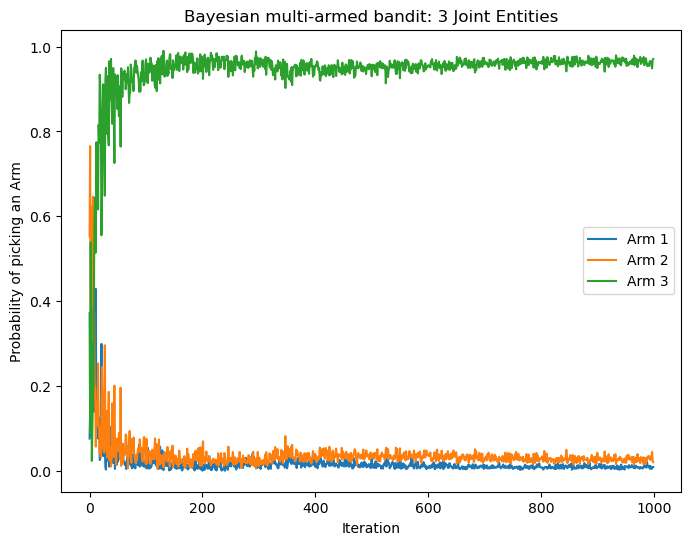

In [67]:
# Question 3: Analysis 2
# Initialize parameters
alpha1, alpha2, alpha3 = 1, 1, 1; x1, x2, x3 = 0, 0, 0
domain, result1, result2, result3 = [], [], [], []

# Normalize true_theta values
normalize = theta1 + theta2 + theta3
true_theta = [theta1 / normalize, theta2 / normalize, theta3 / normalize]

for t in range(total_time):
    # Sample from Dirichlet distribution
    probs = stats.dirichlet.rvs([alpha1 + x1, alpha2 + x2, alpha3 + x3], size=1)[0]
    
    domain.append(t); result1.append(probs[0]); result2.append(probs[1]); result3.append(probs[2])
    
    # Simulate data from multinomial distribution
    data = stats.multinomial.rvs(n=2, p=true_theta, size=1)
    
    # Choose an arm based on sampled probabilities
    result = choice([0, 1, 2], p=probs)

    # Update counts based on the chosen arm
    if result == 0:
        x1 += data[0][0]
    elif result == 1:
        x2 += data[0][1]
    else:
        x3 += data[0][2]

plt.figure(figsize=(8, 6))
plt.plot(domain, result1, label='Arm 1')
plt.plot(domain, result2, label='Arm 2')
plt.plot(domain, result3, label='Arm 3')
plt.xlabel('Iteration')
plt.ylabel('Probability of picking an Arm')
plt.title('Bayesian multi-armed bandit: 3 Joint Entities')
plt.legend()
plt.show('png')

In [66]:
# Question 3: Discussion 
response = """
                                            --- [Question 3 Discussion] ---
                                            
The choice between which of the two approaches is most appropriate depends on the context of the problem. When information 
about the entities (arms) is independent (i.e., knowing information about one arm doesn't give any additional information on 
the remaining arms), then the beta-binomial approach is more appropriate. In this case, we analyze the data separately, each 
arm having its own Beta distribution, which together determines which arm to choose, and the Binomial distribution, which 
updates its respective Beta distribution. The Beta model is thus responsible for balancing the exploration and exploitation 
tradeoffs, and the Binomial distribution is responsible for providing the Beta distribution information on which arm is more 
favorable.

For example, if there are three slot machines and we are interested in finding and playing on the slot machine with the 
largest payoffs, then deploying a Bayesian multi-armed bandit strategy would be helpful. Assuming each slot machine's payoffs 
are independent of the other slot machines, we would want to explore the three slot machines to gather information on which 
has the largest payoffs, then spend the remaining time exploiting that slot machine. When a given slot machine yields a 
successful outcome (modeled using a Binomial(1, p)), we update the machine's respective Beta distribution. Now, when 
determining which of the slot machines to go to next, we compare each Beta distribution to find the machine that has the 
largest comparative probability. Over time, the machine that yields the most successes would be more favored and thus more
exploited.

On the other hand, the Dirichlet-Multinomial model is better suited when the entities share some underlying structure that 
allows for information sharing. Suppose the slot machines are all connected to a central jackpot or their payouts are 
influenced by a shared pool of probabilities - a Dirichlet-Multinomial model allows the outcomes from one machine to inform 
the probabilities of the others. This joint analysis leverages the shared structure to optimize the allocation of 
exploration and exploitation across all machines, leading to potentially faster convergence to the optimal strategy. All in 
all the choice between which strategy is better dependends on the context of the real world problem.
"""

print(response)


                                            --- [Question 3 Discussion] ---
                                            
The choice between which of the two approaches is most appropriate depends on the context of the problem. When information 
about the entities (arms) is independent (i.e., knowing information about one arm doesn't give any additional information on 
the remaining arms), then the beta-binomial approach is more appropriate. In this case, we analyze the data separately, each 
arm having its own Beta distribution, which together determines which arm to choose, and the Binomial distribution, which 
updates its respective Beta distribution. The Beta model is thus responsible for balancing the exploration and exploitation 
tradeoffs, and the Binomial distribution is responsible for providing the Beta distribution information on which arm is more 
favorable.

For example, if there are three slot machines and we are interested in finding and playing on the slot machine with 